# Can I predict the rating of a movie ?
#### Svetozar Mateev

I have a dataset with 5000+ movies scraped from IMDB and my goal is to predict what will the movie rating be before anyone has voted based on the attributes which are in the dataset. The author has acknowledged the fact that some movie budgets and grosses are not in USD and also that the inflation factor isn't present. Also some of the values are 0's because the web scraping algorithm which he used couldn't find what he was searching for.

Firts of all I am going to start with the imports. I am going to neeed both data science and machine learning libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder


from sklearn.linear_model import Lasso,Ridge,ElasticNet,BayesianRidge,ARDRegression,RANSACRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor


### Exploatory data analysis

#### Data cleaning

In [2]:
movie_data = pd.read_csv ("movie_metadata.csv")
movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

My attributes are: color, director name, number of critic for reviews, duration,
       director facebook likes, third actor facebook likes, Name of second actor,
       first actor facebook likes, gross, genres, Name of first actor,
       movie title, number if voted users, cast total facebook likes,
       Name of third actor, Number of faces in poster, plot keywords,
       movie imdb link, number of user for reviews, language, country,
       content rating, budget, title year, Second actor facebook likes,
       imdb score, aspect ratio, movie Facebook likes.

In [3]:
columns = movie_data.columns
for col in columns:
    
    if movie_data['%s'% (col)].isnull().any()==True:
        print(col)
print(movie_data.color[movie_data.color.isnull()].shape) 
print(movie_data.director_name[movie_data.director_name.isnull()].shape) 
print(movie_data.num_critic_for_reviews[movie_data.num_critic_for_reviews.isnull()].shape )  #fill NaN here
print(movie_data.duration[movie_data.duration.isnull()].shape)  # fill NaN here
print(movie_data.director_facebook_likes[movie_data.director_facebook_likes.isnull()].shape)   # fill NaN here
print(movie_data.actor_3_facebook_likes[movie_data.actor_3_facebook_likes.isnull()].shape )  # fill NaN here
print(movie_data.actor_2_name[movie_data.actor_2_name.isnull()].shape)   
print(movie_data.actor_1_facebook_likes[movie_data.actor_1_facebook_likes.isnull()].shape )  # fill NaN here
print(movie_data.gross[movie_data.gross.isnull()].shape)   # fill Nan here
print(movie_data.actor_1_name[movie_data.actor_1_name.isnull()].shape  ) 
print(movie_data.actor_3_name[movie_data.actor_3_name.isnull()].shape )  
print(movie_data.facenumber_in_poster[movie_data.facenumber_in_poster.isnull()].shape   )# fill NaN here
print(movie_data.plot_keywords[movie_data.plot_keywords.isnull()].shape  ) 
print(movie_data.num_user_for_reviews[movie_data.num_user_for_reviews.isnull()].shape   )# fill NaN here
print(movie_data.language[movie_data.language.isnull()].shape   )
print(movie_data.country[movie_data.country.isnull()].shape) 
print(movie_data.content_rating[movie_data.content_rating.isnull()].shape)  
print(movie_data.budget[movie_data.budget.isnull()].shape) # fill NaN here  
print(movie_data.title_year[movie_data.title_year.isnull()].shape) 
print(movie_data.actor_2_facebook_likes[movie_data.actor_2_facebook_likes.isnull()].shape)  
print(movie_data.aspect_ratio[movie_data.aspect_ratio.isnull()].shape)# fill Nan here



color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
actor_1_name
actor_3_name
facenumber_in_poster
plot_keywords
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
aspect_ratio
(19,)
(104,)
(50,)
(15,)
(104,)
(23,)
(13,)
(7,)
(884,)
(7,)
(23,)
(13,)
(153,)
(21,)
(12,)
(5,)
(303,)
(492,)
(108,)
(13,)
(329,)


After I checked for Nan's it turned out that there aren't that many. Nevertheless I am going to fill most of them with their mean value.

In [4]:
movie_data.num_critic_for_reviews=movie_data.num_critic_for_reviews.fillna(movie_data.num_critic_for_reviews.mean())
movie_data.duration = movie_data.duration.fillna(movie_data.duration.mean())
real_director_likes= movie_data.director_facebook_likes[movie_data.director_facebook_likes!=0]
real_director_likes = real_director_likes.dropna()
movie_data.director_facebook_likes=movie_data.director_facebook_likes.fillna(real_director_likes.mean())

movie_data.actor_3_facebook_likes= movie_data.actor_3_facebook_likes.fillna(movie_data.actor_3_facebook_likes.mean())

gross_real_values= movie_data.gross[movie_data.gross !=0]
gross_real_values= gross_real_values.dropna()
movie_data.gross= movie_data.gross.fillna(gross_real_values.mean())

movie_data.gross = movie_data.gross/1000000
movie_data.facenumber_in_poster= movie_data.facenumber_in_poster.fillna(movie_data.facenumber_in_poster.mean())
movie_data.num_user_for_reviews= movie_data.num_user_for_reviews.fillna(movie_data.num_user_for_reviews.mean())
movie_data.budget= movie_data.budget.fillna(movie_data.budget.mean())
movie_data.budget= movie_data.budget/1000000
movie_data.aspect_ratio= movie_data.aspect_ratio.fillna(movie_data.aspect_ratio.mean())
movie_data=movie_data.dropna().reset_index(drop=True)


Some columns had an unusual amount of 0's so I read in the documentation that this was a web scraper bug so I did't use them for the filling.But according to the author and other research that I had read in kaggle it is ok to use them because we are not sure of the reason why the web scraper didn't read the values.

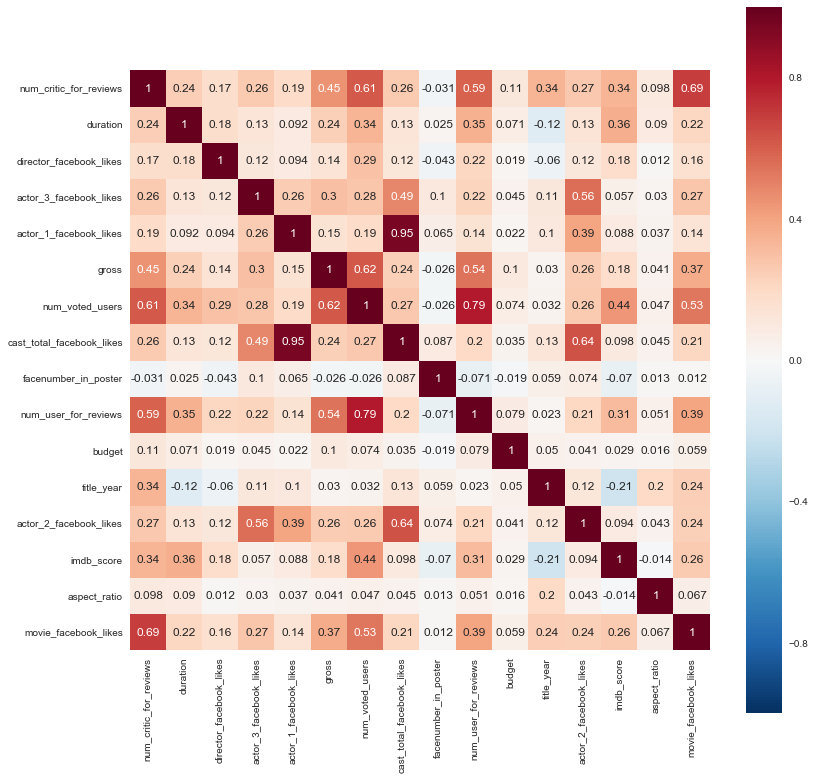

In [5]:
plt.figure(figsize=(13,13))
basic_matrix=movie_data.corr()
sns.heatmap(basic_matrix, square=True,annot=True)
plt.show()

Here is a correlation matrix of all numerical variables. I am using it so I can see the data better and because of the strong correlation between the facebook likes of the first actor and the number of critics for reviews I am going to drop the one of them.

In [6]:
movie_data = movie_data.drop(['actor_1_facebook_likes'],axis=1)
movie_data = movie_data.drop(['movie_imdb_link'], axis=1)
movie_data.shape

(4581, 26)

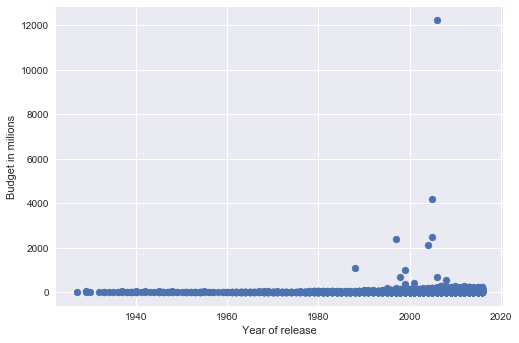

987     The Messenger: The Story of Joan of Arc 
1300                                  Red Cliff 
2246                          Princess Mononoke 
2257                                   Steamboy 
2880                                   The Host 
2897                                   Fateless 
2962                     Kabhi Alvida Naa Kehna 
3178                   The Legend of Suriyothai 
3278                                      Akira 
3657                                      Tango 
3665                             Lady Vengeance 
4231                              Godzilla 2000 
Name: movie_title, dtype: object


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
plt.scatter(movie_data.title_year,movie_data.budget)
plt.xlabel("Year of release")
plt.ylabel("Budget in milions")
plt.show()
odd_movies= movie_data[movie_data.budget>380]
print(odd_movies.movie_title)


movie_data.budget.loc[movie_data.budget==390.000000]=85
movie_data.budget.loc[movie_data.budget==553.632000]=36
movie_data.budget.loc[movie_data.budget==2400.000000]=23.5
movie_data.budget.loc[movie_data.budget==2127.519898]=22
movie_data.budget.loc[movie_data.budget==12215.500000]=40
movie_data.budget.loc[movie_data.budget==2500.000000]=8.5
movie_data.budget.loc[movie_data.budget==700.000000]=7.4
movie_data.budget.loc[movie_data.budget==400.000000]=10.1
movie_data.budget.loc[movie_data.budget==1100.000000]=8
movie_data.budget.loc[movie_data.budget== 700.000000]=4.206
movie_data.budget.loc[movie_data.budget== 4200.000000]=4.5
movie_data.budget.loc[movie_data.budget==1000.000000]=8.3





Here I am looking at how the budjet of a film is variating with time.However I googled the record budget for a movie and it was 380 000 000 not 1.2 billion dollars. So i fixed them with the help of Google and the plot below is the accurate one.

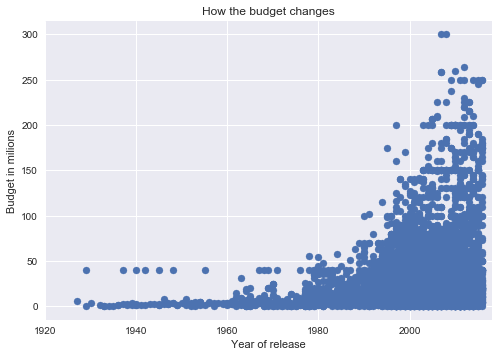

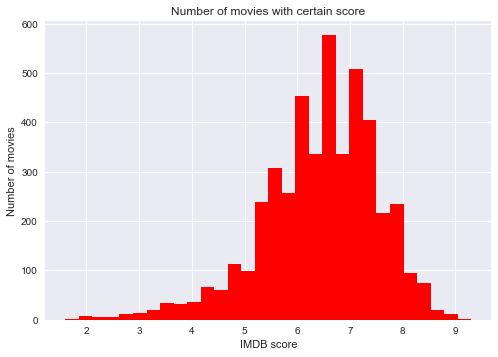

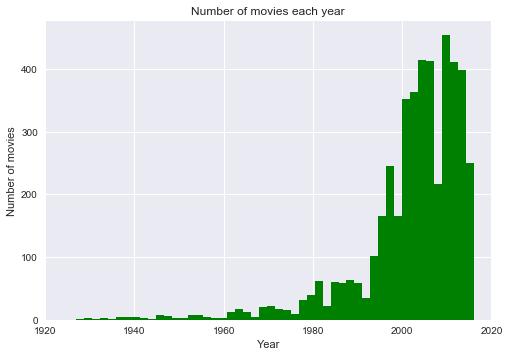

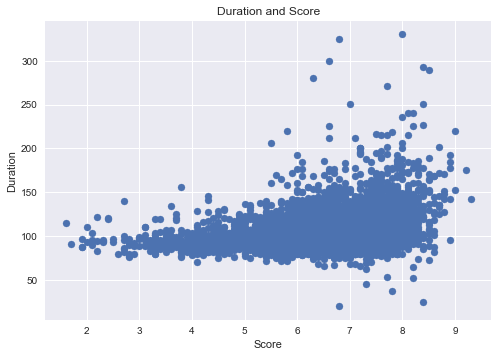

In [8]:
plt.scatter(movie_data.title_year,movie_data.budget)
plt.xlim(1920,2018)
plt.title("How the budget changes")
plt.xlabel("Year of release")
plt.ylabel("Budget in milions")
plt.show()

plt.hist(movie_data.imdb_score,bins=30,color='r')
plt.title("Number of movies with certain score")
plt.xlabel("IMDB score")
plt.ylabel("Number of movies")
plt.show()

plt.hist(movie_data.title_year, bins= 50,color='g')
plt.xlim(1920,2020)
plt.xlabel("Year")
plt.title("Number of movies each year")
plt.ylabel("Number of movies")
plt.show()

plt.scatter(movie_data.imdb_score,movie_data.duration)

plt.title("Duration and Score")
plt.ylabel("Duration")
plt.xlabel("Score")
plt.show()

From the middle 2 plots I can see something very bad. There isn't the same amount of data for each range of values. I think that this won't be benefitial for my models.
From the last plot i can see a slight correlation between the duration and the score which was logical after the results from the correlation matrix.I am going to create a method to help me with the plotting.

In [9]:
def plotting_from_high_to_low(parameter,xlabel,ylabel):
    group_country = movie_data.groupby(by=parameter,as_index=False)
    number_per_country=group_country.size()
    country_to_count ={}

    names=[]
    for g in group_country:
        names.append(g[0])


    counter=0
    for o in number_per_country:
        country_to_count[names[counter]]=o
        counter+=1
    v_counter=0
    values=[]
    for z in sorted(country_to_count.values(),reverse=True):
        values.append(z)
        if v_counter>8:
            break
        v_counter+=1
    n_counter=0
    name=[]
    for y in sorted(country_to_count, key=country_to_count.__getitem__,reverse=True):
        name.append(y)
        if n_counter>8:
            break
        n_counter+=1

    plt.bar(left=range(10),height=values,align='center')
    plt.xticks(range(10),name,rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

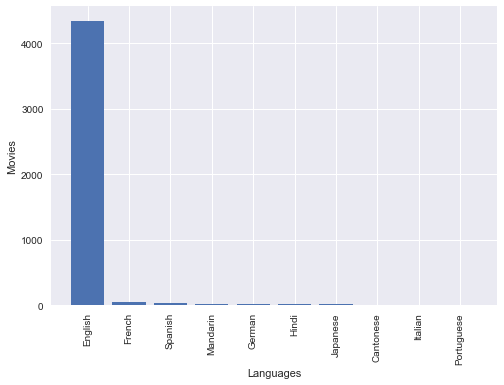

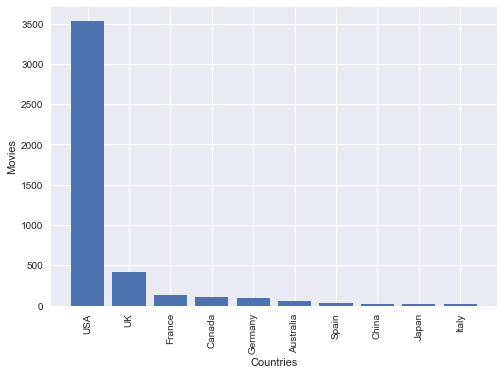

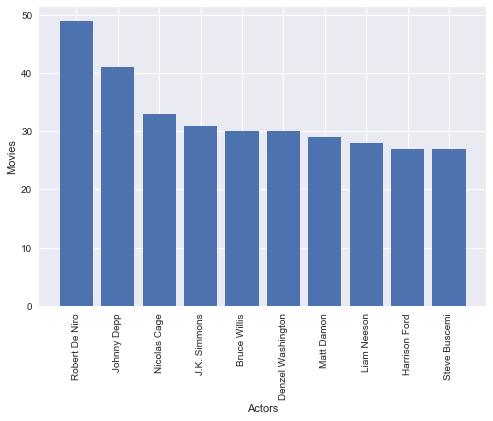

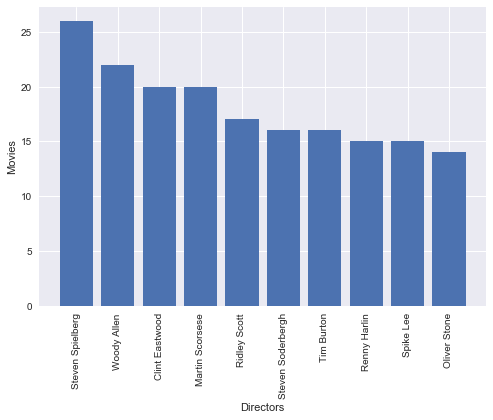

In [10]:
plotting_from_high_to_low('language','Languages','Movies')
plotting_from_high_to_low('country','Countries','Movies')
plotting_from_high_to_low('actor_1_name','Actors','Movies')
plotting_from_high_to_low('director_name','Directors','Movies')

I can see that the results from the first two plots will make my life harder when I am using them to predict the IMDB score because again they are inconssistent. Nevertheless the last two plots show that there isn't anyone who is dominating in terms of actors and directors like in the previous two graphs

In [11]:

#group_country = movie_data.groupby(by='country',as_index=False)
#number_per_country=group_country.size()
#country_to_count ={}
#
#names=[]
#for g in group_country:
#    names.append(g[0])
#
#
#counter=0
#for o in number_per_country:
#    country_to_count[names[counter]]=o
#    counter+=1
#v_counter=0
#values=[]
#for z in sorted(country_to_count.values(),reverse=True):
#    values.append(z)
#    if v_counter>8:
#        break
#    v_counter+=1
#n_counter=0
#name=[]
#for y in sorted(country_to_count, key=country_to_count.__getitem__,reverse=True):
#    name.append(y)
#    if n_counter>8:
#        break
#    n_counter+=1
#
#plt.bar(left=range(10),height=values,align='center')
#plt.xticks(range(10),name,rotation=90)
#plt.show()


And in terms of directors Steven Spilberg is leading in terms of movies made.The actor Robert De Niro has the most movies as the main actor.However Johnny Depp isn't too far behind.From the diagram I can confidentrly say that the USA are the leader in film making according to my data.

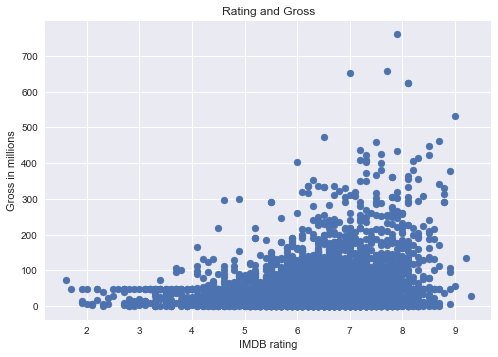

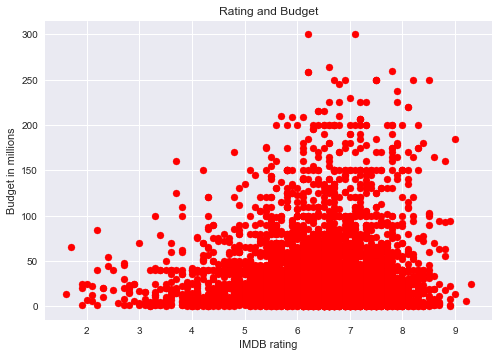

In [12]:
plt.title("Rating and Gross")
plt.scatter(movie_data.imdb_score, movie_data.gross)
plt.xlabel("IMDB rating")
plt.ylabel("Gross in millions")
plt.show()
plt.title("Rating and Budget")
plt.scatter(movie_data.imdb_score,movie_data.budget,color='r')
plt.xlabel("IMDB rating")
plt.ylabel("Budget in millions")
plt.show()


From the plots I can see that the rating of a movie clearly isn't connected neither to the budget nor to the gross.

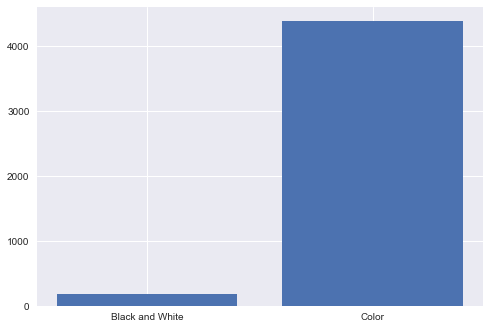

4.1257367387%
95.8742632613%


In [13]:
color_group = movie_data.groupby(by='color')
occurences=color_group.size()
plt.bar(left=[0,1], height = occurences,align='center')
plt.xticks([0,1],["Black and White","Color"] )
plt.show()
for o in occurences:
    print(str(o/len(movie_data)*100)+'%')

As I expected only 4.12% of the movies are black and white and almost all have color.

In [14]:
movie_data.genres
all_genres=set()

for m in movie_data.genres.unique():
    list_genres=m.split('|')
    for i in list_genres:
        all_genres.add(i)
    
    


new_col=pd.DataFrame(columns=all_genres,index=range(len(movie_data)))
for c in range(len(new_col)):
    this_movie_genres=movie_data.iloc[c].genres.split("|")
    for col in new_col.columns:
        if col in this_movie_genres:
            new_col.iloc[c][col]=1
        else:
            new_col.iloc[c][col]=0

movie_data=pd.concat([movie_data,new_col],axis=1)


In [15]:
movie_data=movie_data.drop('genres',axis=1)
print(movie_data.head())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    475.0                   530.0   Samantha Morton   

        gross     actor_1_name                                movie_title  \
0  760.505847      CCH Pounder                                    Avatar    
1  309.404152      Joh

### Model testing 

In [16]:
#'color', 'director_name', 'num_critic_for_reviews', 'duration',
#       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
#       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
#       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
#       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
#       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
#       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
#       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'
workable_data = movie_data.drop(["content_rating","movie_title","director_name",
                                 "actor_1_name","actor_2_name","plot_keywords","actor_3_name"], axis=1)
scaler=StandardScaler()
attributes = scaler.fit_transform(pd.get_dummies(workable_data.drop('imdb_score',axis=1)),workable_data['imdb_score'])
labels = workable_data['imdb_score']
attr_train,attr_test,l_train,l_test = train_test_split(attributes,labels, train_size=0.7)


After I have processed the data in a way in which it is scaled, easy to fit and train and I have dropped some of the columns which can't be used or are not appropriate to use. I am going to try different models.
First the method is doing a grid search to find the best parameters then it is cross validating twice- the first time for the r2 score and the second time for the negative mean squared error.I am going to evaluate the model's performance with a negative mean squared error and r2 score. My main concern is that the models will be very unstable because of the data.

In [17]:
parameters={"fit_intercept":[True,False],"normalize":[True,False]}
score_model = LinearRegression()
grid=GridSearchCV(score_model,parameters)
grid.fit(attr_train,l_train)
print(grid.best_params_)
print(grid.best_score_)

{'fit_intercept': True, 'normalize': False}
-1.52906852828e+27


In [18]:
def best_params(model,parameters,attr_train,l_train,attr_test,l_test,attributes,labels):
    grid=GridSearchCV(model,parameters)
    grid.fit(attr_train,l_train)
    kfold= StratifiedKFold(n_splits=5, shuffle = True)
    folds = kfold.get_n_splits(attr_train,l_train)
    cross= cross_val_score(model,attributes,labels,cv=folds,scoring='r2')
    cross2= cross_val_score(model,attributes,labels,cv=folds,scoring='neg_mean_squared_error')

    print(grid.best_params_)
    print('Grid Score',grid.best_score_)
    print('R2 score',cross)
    print('Negative mean squared error',cross2)
 
    

In [19]:
score_model=LinearRegression(n_jobs=16)
score_model.fit(attr_train,l_train)
cross= cross_val_score(score_model,attributes,labels,cv=3,scoring='r2')
cross

array([ -2.78716468e+27,  -5.95644339e+26,  -1.19245400e+27])

In [20]:
lasso_model = Lasso()
parameters={"alpha": [0.9,0.81,1.1,1.2]}
best_params(lasso_model,parameters,attr_train,l_train,attr_test,l_test,attributes,labels)

{'alpha': 0.9}
Grid Score -0.000834597752473
R2 score [-0.00432857 -0.00602907 -0.01575349 -0.003927   -0.00557895]
Negative mean squared error [-0.9992169  -0.996503   -1.39344431 -1.1742522  -1.48718679]


In [21]:
ridge_model = Ridge()
parameters={"alpha": [13,14,15,16,17,50,100,200]}
best_params(ridge_model,parameters,attr_train,l_train,attr_test,l_test,attributes,labels)


{'alpha': 50}
Grid Score 0.485638729908
R2 score [ 0.50492601  0.53627159  0.47708229  0.45635965  0.44742065]
Negative mean squared error [-0.49255424 -0.45933737 -0.71735585 -0.6358738  -0.81722943]


In [22]:
elastic_model=ElasticNet()
parameters={"alpha": [2,5,3,4,6,7,8],"l1_ratio":[0.1,0.2,0.3,0.4,0.5]}
best_params(elastic_model,parameters,attr_train,l_train,attr_test,l_test,attributes,labels)

{'alpha': 2, 'l1_ratio': 0.1}
Grid Score 0.148062591371
R2 score [-0.00432857 -0.00439645 -0.01575349  0.00491515  0.00362176]
Negative mean squared error [-0.9992169  -0.99488583 -1.39344431 -1.1639099  -1.47357954]


In [23]:
ransac=RANSACRegressor()
params={}
best_params(ransac,params,attr_train,l_train,attr_test,l_test,attributes,labels)

{}
Grid Score -1.99978898728e+27
R2 score [ -1.12976802e+26  -2.44262800e+26  -1.51025286e+26  -2.58567962e+26
  -6.72087739e+26]
Negative mean squared error [ -1.08577959e+25  -2.48460713e+25  -5.77112594e+25  -3.11278590e+26
  -5.66348319e+26]


In [24]:
tree= DecisionTreeRegressor()
parameters={"criterion": ['mse','mae'],"max_depth":[None,1,2,3,5,6]}
best_params(tree,parameters,attr_train,l_train,attr_test,l_test,attributes,labels)

{'criterion': 'mse', 'max_depth': 5}
Grid Score 0.379644115897
R2 score [ 0.15924321  0.14707652  0.16236615  0.07340586 -0.01920324]
Negative mean squared error [-0.86533261 -0.87463974 -1.09318777 -1.14677948 -1.60106987]


In [25]:
forest = RandomForestRegressor(n_jobs=-1)
parameters={"n_estimators":[1000,500,2000],"max_depth":[1,10,50,None,100]}
best_params(forest,parameters,attr_train,l_train,attr_test,l_test,attributes,labels)

{'max_depth': 50, 'n_estimators': 500}
Grid Score 0.57317241607
R2 score [ 0.52601244  0.57245662  0.53663784  0.46389749  0.36571916]
Negative mean squared error [-0.47396521 -0.43733024 -0.62798886 -0.60788275 -0.9817488 ]


In [26]:
adaboost = AdaBoostRegressor()
parameters={ 'n_estimators' :[200, 100, 50,25], 'learning_rate':[0.5, 0.1,0.01]}
best_params(adaboost,parameters,attr_train,l_train,attr_test,l_test,attributes,labels)

{'learning_rate': 0.1, 'n_estimators': 100}
Grid Score 0.369601693259
R2 score [ 0.4097726   0.44824792  0.36442511  0.21458393 -0.06350578]
Negative mean squared error [-0.62496014 -0.55231088 -0.83148927 -1.08653071 -1.49465851]


In [27]:
br=BayesianRidge()
params={'n_iter':[100,150],'tol':[0.001,0.01,1,2],'alpha_1':[10,1e-01,1],
        'alpha_2':[0.00001,0.0001,0.001],
        'lambda_1':[1e-12,1e-10,1e-13], 
        'lambda_2':[10,1,1e-01],
        'fit_intercept':[True,False],'normalize':[True,False]}
best_params(br,params,attr_train,l_train,attr_test,l_test,attributes,labels)

{'alpha_1': 10, 'alpha_2': 1e-05, 'fit_intercept': True, 'lambda_1': 1e-12, 'lambda_2': 0.1, 'n_iter': 100, 'normalize': False, 'tol': 1}
Grid Score 0.485579299419
R2 score [ 0.50577395  0.53247406  0.47494993  0.45555443  0.44858357]
Negative mean squared error [-0.49171061 -0.46309894 -0.72028109 -0.63681564 -0.81550955]


In [28]:
nn=MLPRegressor()
params={"hidden_layer_sizes":[(10,10,10,10,10),(100,100,100),(500,500),(66,66,66),(50,60,70,20)]}
search = GridSearchCV(nn,params,n_jobs=-1)
search.fit(attr_train,l_train)
print(search.best_estimator_)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 500), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [29]:
print(search.score(attr_test,l_test))
print(search.score(attr_train,l_train))

0.410720072103
0.753699703214


In [30]:
nn1=MLPRegressor(hidden_layer_sizes=(10,10,10,10,10))
print(cross_val_score(nn1,attributes,labels,n_jobs=-1,scoring='r2'))
print(cross_val_score(nn1,attributes,labels,n_jobs=-1,scoring='neg_mean_squared_error'))

[ 0.35092237  0.25516959 -0.19940104]
[-0.74402894 -0.77958444 -1.52002088]


As I assumpted earlier the models and very stable.However The ridge regression and the bayesian ridge are giving the best results and also are very stable. The Random forest gives me decent results but is very unstable.Now I am going to add inflation to the monetary data.

In google I found a dataset with information about inflation throughout the years.The data is only for the USA but I am going to use it for everywhere because there wasn't any data about the other countries and the USA have the most number of movies by far.

In [31]:
inflation = pd.read_excel('inflation.xlsx')
inflation=inflation.drop([0,1,2,3,4,5,6,7,8,9])
inflation.columns=['year','jan','feb','mar','apr','may','june','jule','aug','sep','oct','nov','dec','half1','half2']
inflation.jan=inflation.jan.astype(float)
inflation.feb=inflation.feb.astype(float)
inflation.mar=inflation.mar.astype(float)
inflation.apr=inflation.apr.astype(float)
inflation.may=inflation.may.astype(float)
inflation.june=inflation.june.astype(float)
inflation.jule=inflation.jule.astype(float)
inflation.aug=inflation.aug.astype(float)
inflation.sep=inflation.sep.astype(float)
inflation['oct']=inflation['oct'].astype(float)
inflation.nov=inflation.nov.astype(float)
inflation.dec=inflation.dec.astype(float)
inflation=inflation.drop(['half1','half2'],axis=1)

inflation['mean']=(inflation.jan+
inflation.feb+inflation.mar
+inflation.apr+inflation.may+inflation.june
+inflation.jule+inflation.aug+inflation.sep+inflation['oct']+inflation.nov+inflation.dec)/12
inflation.reset_index(inplace=True,drop=True)
inflation.head()

,year,jan,feb,mar,apr,may,june,jule,aug,sep,oct,nov,dec,mean
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.883333
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.016667
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.108333
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,10.883333
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,12.825000


In [32]:

def calculateInflation(year_wanted,year_now,num):
    price_now=-1
    price_future=-1
    year_wanted_num = year_wanted-1913
    year_now_num = year_now-1913
    counter=0
    for i in inflation['mean']:    
        if counter==year_now_num:
            price_now=i
        if counter==year_wanted_num:
            price_future=i
        counter+=1
  
    year_wanted_num
    
    inflation_rate=(price_future-price_now)/price_now
 
    return(num*inflation_rate+num)
    


This is a function which I use to change the data.

In [33]:
budgets=pd.DataFrame()
grosses=pd.DataFrame()
budgets['adj_budget']=movie_data.budget
grosses['adj_gross']=movie_data.gross

for i in range(len(movie_data)):
    budgets.iloc[i].adj_budget=calculateInflation(2016,movie_data.iloc[i].title_year,movie_data.iloc[i].budget)
    grosses.iloc[i].adj_gross=calculateInflation(2016,movie_data.iloc[i].title_year,movie_data.iloc[i].gross)
   
    

In [34]:
movie_data=pd.concat([movie_data,budgets],axis=1)
movie_data=pd.concat([movie_data,grosses],axis=1)
movie_data=movie_data.drop(['budget','gross'],axis=1)
movie_data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_name,movie_title,num_voted_users,...,Fantasy,Film-Noir,Western,Adventure,Sport,Musical,Mystery,Sci-Fi,adj_budget,adj_gross
0,Color,James Cameron,723.000000,178.0,0.0,855.0,Joel David Moore,CCH Pounder,Avatar,886204,...,1,0,0,1,0,0,0,1,265.137009,850.794285
1,Color,Gore Verbinski,302.000000,169.0,563.0,1000.0,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,1,0,0,1,0,0,0,0,347.262037,358.147720
2,Color,Sam Mendes,602.000000,148.0,0.0,161.0,Rory Kinnear,Christoph Waltz,Spectre,275868,...,0,0,0,1,0,0,0,0,248.090879,202.598277
3,Color,Christopher Nolan,813.000000,164.0,22000.0,23000.0,Christian Bale,Tom Hardy,The Dark Knight Rises,1144337,...,0,0,0,0,0,0,0,0,261.338770,468.455642
4,Color,Andrew Stanton,462.000000,132.0,475.0,530.0,Samantha Morton,Daryl Sabara,John Carter,212204,...,0,0,0,1,0,0,0,1,275.660134,76.372261
5,Color,Sam Raimi,392.000000,156.0,0.0,4000.0,James Franco,J.K. Simmons,Spider-Man 3,383056,...,0,0,0,1,0,0,0,0,298.645352,389.547329
6,Color,Nathan Greno,324.000000,100.0,15.0,284.0,Donna Murphy,Brad Garrett,Tangled,294810,...,1,0,0,1,0,1,0,0,286.174223,221.022547
7,Color,Joss Whedon,635.000000,141.0,0.0,19000.0,Robert Downey Jr.,Chris Hemsworth,Avengers: Age of Ultron,462669,...,0,0,0,1,0,0,0,1,253.153958,464.782160
8,Color,David Yates,375.000000,153.0,282.0,10000.0,Daniel Radcliffe,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,...,1,0,0,1,0,0,1,0,279.680389,337.805783
9,Color,Zack Snyder,673.000000,183.0,0.0,2000.0,Lauren Cohan,Henry Cavill,Batman v Superman: Dawn of Justice,371639,...,0,0,0,1,0,0,0,1,250.000000,330.249062


In [35]:
working_data =movie_data.drop(["content_rating","movie_title",
                                 "actor_1_name","actor_2_name","actor_1_name","plot_keywords","actor_3_name"], axis=1)
attributes=working_data.drop('imdb_score',axis=1)
scale=StandardScaler()

labels=working_data.imdb_score
attributes=scale.fit_transform(pd.get_dummies(attributes),labels)
attr_train,attr_test,l_train,l_test= train_test_split(attributes,labels,train_size=0.7)

scaled_attr_train=attr_train
scaled_attr_test=attr_test
scaled_attr= attributes
kfold= StratifiedKFold(n_splits=10, shuffle = True)
folds = kfold.get_n_splits(scaled_attr_train,l_train)

In [36]:
kfold= StratifiedKFold(n_splits=4, shuffle = True)
folds = kfold.get_n_splits(scaled_attr,labels)

Now I am going to examine in detail a couple of the previous models which were giving interesting results.

### Ridge

In [37]:
ridge_scl=Ridge()
params={'alpha':[0.1,1,2,10,15,20],'normalize':[True,False],'fit_intercept':[True,False]}
grid=GridSearchCV(ridge_scl,params)
grid.fit(scaled_attr_train,l_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 1, 2, 10, 15, 20], 'normalize': [True, False], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [38]:
ridge_scl1=Ridge()
print(cross_val_score(ridge_scl1,scaled_attr,labels,cv=folds,scoring='r2'))
print(cross_val_score(ridge_scl1,scaled_attr,labels,cv=folds,scoring='neg_mean_squared_error'))

[ 0.34556212  0.4165717   0.30203515  0.20296834]
[-0.64598424 -0.67562897 -0.85511891 -1.15123383]


In [39]:
ridge_scl1.fit(scaled_attr_train,l_train)
predicted=ridge_scl1.predict(scaled_attr_test)

-0.04636745620352066
3.44289737844


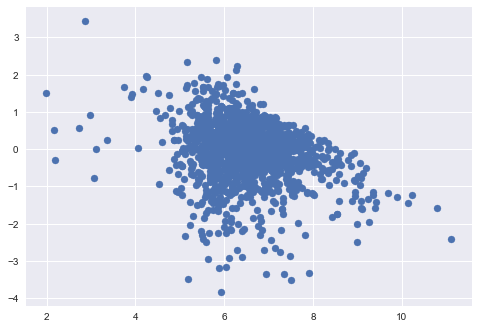

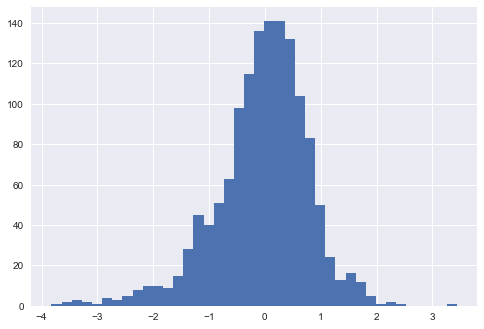

In [40]:
print((l_test-predicted).mean())
print((l_test-predicted).max())
plt.scatter(predicted,l_test-predicted)
plt.show()
plt.hist(l_test-predicted,bins=40)
plt.show()

### Random Forest

In [41]:
forest = RandomForestRegressor(n_estimators=2000, max_depth=10,n_jobs=-1)
print(cross_val_score(forest,scaled_attr,labels,cv=folds,n_jobs=-1,scoring='r2'))
print(cross_val_score(forest,scaled_attr,labels,cv=folds,n_jobs=-1,scoring='neg_mean_squared_error'))


[ 0.52117232  0.53711447  0.50776942  0.37966116]
[-0.47391486 -0.53483983 -0.60306926 -0.89884557]


In [42]:
forest.fit(scaled_attr_train,l_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [43]:
predicted=forest.predict(scaled_attr_test)
y=predicted-l_test
print(y.mean())

-0.02421126303957002


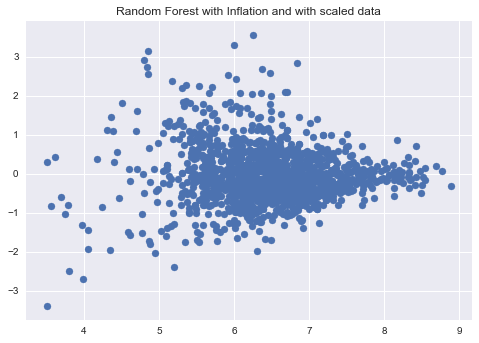

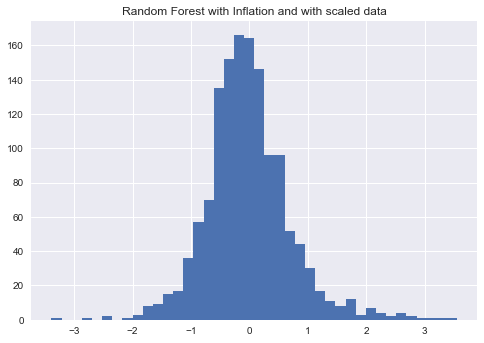

In [44]:
plt.scatter(predicted,y)
plt.title("Random Forest with Inflation and with scaled data")
plt.show()
plt.title("Random Forest with Inflation and with scaled data")
plt.hist(y,bins=40)
plt.show()

In [45]:
forest.score(scaled_attr_train,l_train)

0.7858959431965159

The results are actually slightly better. There is still some difference in the cross validation results but in comparison to the previous Random Forest they are smaller and the scores are higher.

### Neural network

In [46]:
nn1=MLPRegressor()
params={'hidden_layer_sizes':[(100,100,100),(100,),(30,30,30,30,30),(80,20,50,15,60),(30,30,30,30,30)]}
grid=GridSearchCV(nn1,params,n_jobs=-1)
grid.fit(scaled_attr_train,l_train)
print(grid.best_params_)

{'hidden_layer_sizes': (100, 100, 100)}


In [47]:
nn2=MLPRegressor(hidden_layer_sizes=(30, 30, 30, 30, 30))
cross_val_score(nn2,scaled_attr,labels,n_jobs=-1,cv=folds)

array([-2.22880559, -0.9471933 , -2.60283374, -2.9470509 ])

The model is very unstable and the scores are low so I am not going to examine it any further

### Bayesian Ridge

In [48]:
bRidge=BayesianRidge()
params={'n_iter':[100],'tol':[1],'alpha_1':[10,1],
        'alpha_2':[0.00001,0.0001,0.001],
        'lambda_1':[1e-12,1e-10,1e-13], 
        'lambda_2':[10,1,1e-01],
        'fit_intercept':[True],'normalize':[False]}
grid=GridSearchCV(bRidge,params,n_jobs=-1)
grid.fit(scaled_attr_train,l_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_iter': [100], 'tol': [1], 'alpha_1': [10, 1], 'alpha_2': [1e-05, 0.0001, 0.001], 'lambda_1': [1e-12, 1e-10, 1e-13], 'lambda_2': [10, 1, 0.1], 'fit_intercept': [True], 'normalize': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [51]:
bridge2=BayesianRidge()
print(cross_val_score(bridge2,scaled_attr,labels,n_jobs=-1,cv=folds,scoring='r2'))
print(cross_val_score(bridge2,scaled_attr,labels,n_jobs=-1,cv=folds,scoring='neg_mean_squared_error'))

[ 0.39995354  0.44759582  0.40848073  0.32167782]
[-0.59229542 -0.63970203 -0.724706   -0.97976966]


[  6.42866875e+00   5.99853704e+00   5.00934736e+00 ...,   1.63245004e-33
   1.19054562e-33   1.82782898e-34]


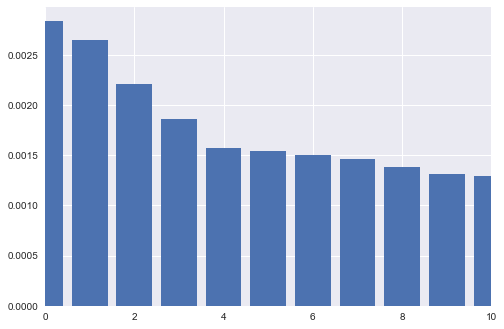

In [52]:
pca=PCA()
pca.fit(attributes)
print(pca.explained_variance_)
plt.bar(list(range(len(pca.components_))), pca.explained_variance_ratio_)
plt.xlim(0,10)
plt.show()

I won't be able to use PCA transformed data because there are a lot of components which affect the end result

In [53]:
movie_data.imdb_score= round(movie_data.imdb_score)
attributes = pd.get_dummies(movie_data.drop(["content_rating","movie_title","director_name",
                                 "actor_1_name","actor_2_name","actor_1_name",
                                          "plot_keywords","actor_3_name","imdb_score"], axis=1))
labels=movie_data.imdb_score
skf=StratifiedKFold(n_splits=5)
attr=skf.get_n_splits(attributes,labels)
attr_train,attr_test,l_train,l_test=train_test_split(attributes,labels,train_size=0.7,stratify=labels)

In [54]:
forest_classifier= RandomForestClassifier(n_jobs=-1)
params={"n_estimators":[10,100,1000],"max_depth":[1,10,20,50]}
grid=GridSearchCV(forest,params)
grid.fit(attr_train,l_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000], 'max_depth': [1, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [55]:
forest_cl = RandomForestClassifier(n_jobs=-1,n_estimators=500, max_depth=10)
cross_val_score(forest_cl,attributes,labels,cv=attr,n_jobs=-1)

array([ 0.52448313,  0.55930359,  0.55398037,  0.52026287,  0.49178532])

## Conclusion

After spending hours and hours in fine tunning and analyzing I think that it is possible to predict the rating of a movie but not with great accuracy. The reason for that for me is that the data is very unbalanced-in many columns only one category dominates and that is logical but it is an obsticle for prediction.Nevertheless the result is useful because the scores are quite tolerable, not the best but tolerable.
If the data is assumpted to be used as a classification the models are much more stable but there is a huge loss in information and accuracy because I think that it is much more useful to know that the movie rating is 8.5 +-0.8 than to know that the movie rating is 8 with 50% accuracy.